#📌 Extracción

In [3]:
import pandas as pd
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [4]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

## Enunciado 1

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])

In [7]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [8]:
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [9]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [10]:
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
datos2 = datos[['customerID','Churn']].copy()

In [12]:
datos2['gender'] = customer['gender']
datos2['SeniorCitizen'] = customer['SeniorCitizen']
datos2['Partner'] = customer['Partner']
datos2['Dependents'] = customer['Dependents']
datos2['tenure'] = customer['tenure']

In [13]:
datos2['PhoneService'] = phone['PhoneService']
datos2['MultipleLines'] = phone['MultipleLines']

In [14]:
datos2['InternetService'] = internet['InternetService']
datos2['OnlineSecurity'] = internet['OnlineSecurity']
datos2['OnlineBackup'] = internet['OnlineBackup']
datos2['DeviceProtection'] = internet['DeviceProtection']
datos2['TechSupport'] = internet['TechSupport']
datos2['StreamingTV'] = internet['StreamingTV']
datos2['StreamingMovies'] = internet['StreamingMovies']

In [15]:
datos2['Contract'] = account['Contract']
datos2['PaperlessBilling'] = account['PaperlessBilling']
datos2['PaymentMethod'] = account['PaymentMethod']
datos2['Charges.Monthly'] = account['Charges.Monthly']
datos2['Charges.Total'] = account['Charges.Total']

In [16]:
datos2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Enunciado 2

In [17]:
columnas = [
    'Churn','gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract',
    'PaperlessBilling','PaymentMethod'
]

for col in columnas:
    print(f"\n>> {col}")
    print(pd.unique(datos2[col]))



>> Churn
['No' 'Yes' '']

>> gender
['Female' 'Male']

>> Partner
['Yes' 'No']

>> Dependents
['Yes' 'No']

>> PhoneService
['Yes' 'No']

>> MultipleLines
['No' 'Yes' 'No phone service']

>> InternetService
['DSL' 'Fiber optic' 'No']

>> OnlineSecurity
['No' 'Yes' 'No internet service']

>> OnlineBackup
['Yes' 'No' 'No internet service']

>> DeviceProtection
['No' 'Yes' 'No internet service']

>> TechSupport
['Yes' 'No' 'No internet service']

>> StreamingTV
['Yes' 'No' 'No internet service']

>> StreamingMovies
['No' 'Yes' 'No internet service']

>> Contract
['One year' 'Month-to-month' 'Two year']

>> PaperlessBilling
['Yes' 'No']

>> PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [18]:
print(datos2['Churn'].value_counts(dropna=False))

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


## Enunciado 3

In [19]:
datos2 = datos2[datos2['Churn'] != '']

In [20]:
print(datos2['Churn'].value_counts(dropna=False))

Churn
No     5174
Yes    1869
Name: count, dtype: int64


##Enunciado 4

In [21]:
datos2 = datos2.copy()
datos2['Cuentas_Diarias'] = datos2['Charges.Monthly'] / 30

In [22]:
print(datos2[['Charges.Monthly','Cuentas_Diarias']].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [23]:
datos2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


## Enunciado 5

In [24]:
binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

for col in binarias:
    datos2[col] = datos2[col].map({'Yes': 1, 'No': 0})

In [25]:
datos2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#📊 Carga y análisis

## Enunciado 1

In [26]:
datos2.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


In [27]:
datos2.describe(include='object')

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Total
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4,6531
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,20.2
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365,11


## Enunciado 2

In [28]:
import matplotlib.pyplot as plt

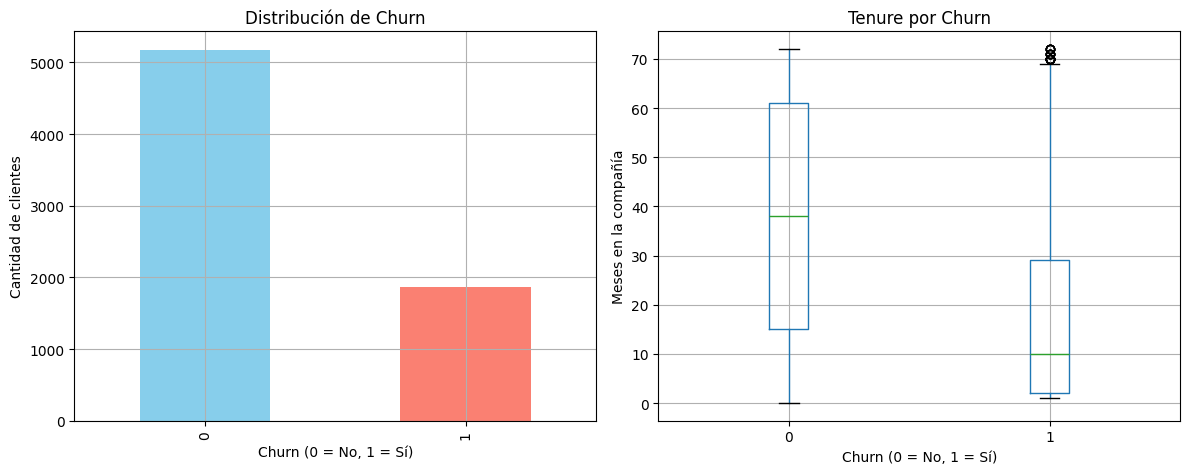

In [29]:
churn_counts = datos2['Churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

churn_counts.plot(kind='bar', color=['skyblue','salmon'], ax=axes[0])
axes[0].set_title('Distribución de Churn')
axes[0].set_xlabel('Churn (0 = No, 1 = Sí)')
axes[0].set_ylabel('Cantidad de clientes')
axes[0].grid(True)

datos2.boxplot(column='tenure', by='Churn', ax=axes[1], grid=True)
axes[1].set_title('Tenure por Churn')
axes[1].set_xlabel('Churn (0 = No, 1 = Sí)')
axes[1].set_ylabel('Meses en la compañía')

plt.suptitle('')
plt.tight_layout()
plt.show()


## Enunciado 3

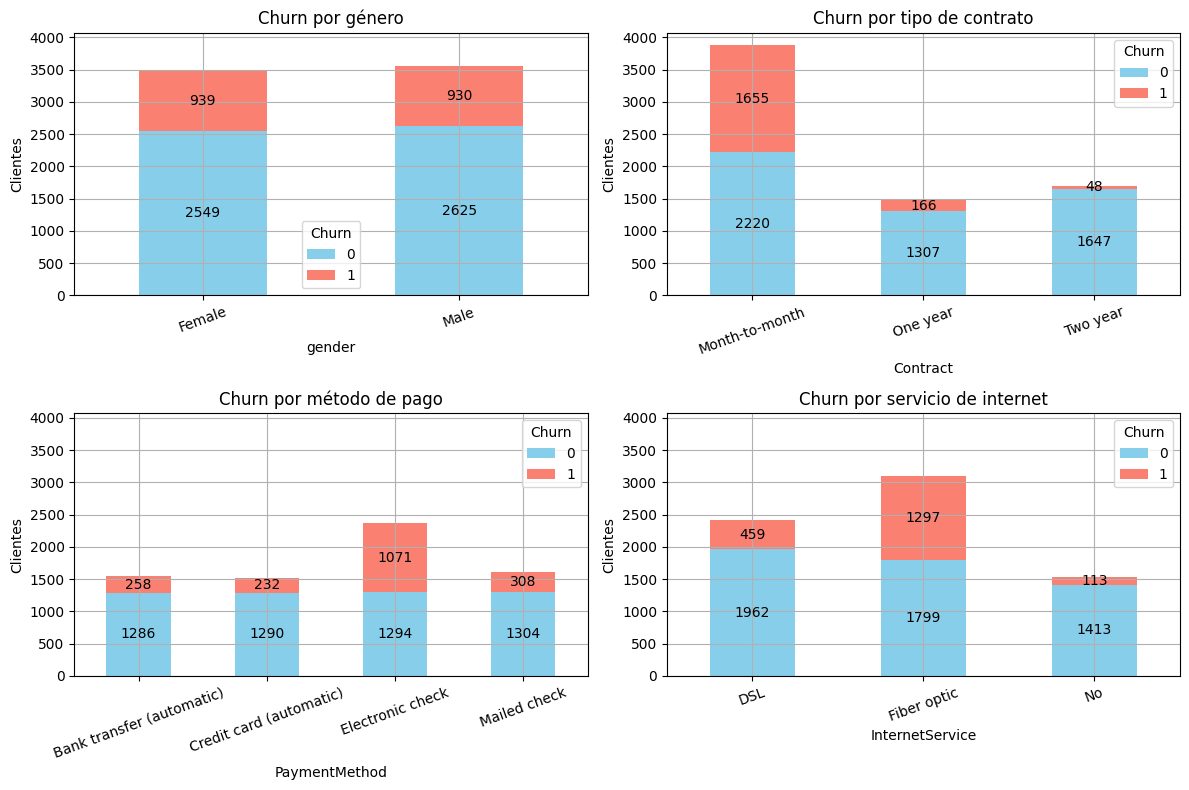

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Lista de variables categóricas
categoricas = ['gender','Contract','PaymentMethod','InternetService']
titulos = ['Churn por género','Churn por tipo de contrato','Churn por método de pago','Churn por servicio de internet']

# Graficar cada variable
for ax, col, titulo in zip(axes.flatten(), categoricas, titulos):
    plot_data = datos2.groupby([col,'Churn']).size().unstack(fill_value=0)
    plot_data.plot(kind='bar', stacked=True, ax=ax, color=['skyblue','salmon'])
    ax.set_title(titulo)
    ax.set_xlabel(col)
    ax.set_ylabel('Clientes')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=20)
    for cont in ax.containers:
        ax.bar_label(cont, label_type='center')

# Ajustar mismo límite en Y
max_y = max([ax.get_ylim()[1] for ax in axes.flatten()])
for ax in axes.flatten():
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()


## Enunciado 4

In [31]:
import plotly.express as px
import pandas as pd
import plotly.subplots as sp

In [32]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Permanencia (meses) vs Cancelación", "Total gastado vs Cancelación"))

b1 = px.box(datos2, x="Churn", y="tenure", color="Churn")
for tr in b1.data:
    fig.add_trace(tr, row=1, col=1)

b2 = px.box(datos2, x="Churn", y="Charges.Total", color="Churn")
for tr in b2.data:
    fig.add_trace(tr, row=1, col=2)

fig.update_xaxes(title_text="Cancelación (0 = No, 1 = Sí)", row=1, col=1)
fig.update_yaxes(title_text="Meses de permanencia", row=1, col=1)

fig.update_xaxes(title_text="Cancelación (0 = No, 1 = Sí)", row=1, col=2)
fig.update_yaxes(title_text="Total gastado", row=1, col=2)

fig.update_layout(showlegend=False, height=500, width=1000, title_text="Distribución de variables numéricas según cancelación")
fig.show()


#📄Informe final

**Informe Final: Análisis de Evasión de Clientes**

***Introducción***

El objetivo de este trabajo fue analizar los datos de clientes de una empresa de telecomunicaciones para entender mejor el problema de la evasión o churn, es decir, aquellos clientes que deciden dejar el servicio. Identificar los factores que influyen en esta decisión es clave para que la empresa pueda tomar medidas y reducir las pérdidas.

***Limpieza y Tratamiento de Datos***

Primero importamos la base de datos y revisamos la calidad de la información. Se eliminaron valores vacíos o inconsistentes y se ajustaron algunas columnas para que fueran fáciles de interpretar, por ejemplo convirtiendo variables categóricas en números. Con esto dejamos la información lista para el análisis.

***Análisis Exploratorio de Datos***

Se realizaron diferentes visualizaciones para explorar cómo se comportan los clientes que permanecen frente a los que se van.

*   En las gráficas vimos que los clientes que se quedan suelen tener una mayor antigüedad (tenure), mientras que los que se van por lo general permanecen pocos meses en la empresa.
*   En cuanto al gasto total, se observó que muchos de los clientes que se van suelen estar en rangos más bajos de gasto, lo que podría indicar que no encuentran valor suficiente en el servicio o que prefieren cambiarse a una opción más económica
* Los gráficos también ayudaron a visualizar que existen diferencias claras entre ambos grupos, lo que da pistas de que el churn no ocurre al azar, sino que sigue ciertos patrones.

***Conclusiones e Insights***

Del análisis podemos destacar algunos hallazgos importantes:

1.   Los clientes con poca antigüedad son los que más tienden a abandonar el servicio.
2.   Los clientes con bajo gasto mensual también aparecen con una mayor tasa de churn.
3. Existe un grupo de clientes con características muy marcadas que podrían ser detectados antes de que decidan irse.

En resumen, la información demuestra que el churn se puede predecir y que la empresa tiene la oportunidad de actuar con anticipación.

***Recomendaciones***

* Implementar un programa de fidelización para clientes nuevos, ya que los primeros meses parecen ser críticos.
* Ofrecer planes personalizados o descuentos a clientes de bajo gasto, para aumentar su percepción de valor y evitar que busquen alternativas más baratas.
* Usar modelos predictivos de churn para que el equipo de atención pueda detectar con tiempo a los clientes con mayor riesgo y ofrecerles soluciones antes de que cancelen.
* Mejorar la experiencia del cliente en general, porque la confianza y la relación a largo plazo son las que más influyen en que se queden.

In [33]:
datos2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.796667


In [34]:
datos2.to_csv("datos_tratados.csv", index=False)

In [35]:
datos2 = datos2.drop(['customerID'], axis=1)

In [36]:
datos2.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.796667


In [37]:
import pandas as pd

In [38]:
datos2_encoded = pd.get_dummies(datos2, drop_first=True)

In [39]:
print(datos2_encoded.head())

   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0              0        1           1       9             1   
1      0              0        0           0       9             1   
2      1              0        0           0       4             1   
3      1              1        1           0      13             1   
4      1              1        1           0       3             1   

   PaperlessBilling  Charges.Monthly  Cuentas_Diarias  gender_Male  ...  \
0                 1             65.6         2.186667        False  ...   
1                 0             59.9         1.996667         True  ...   
2                 1             73.9         2.463333         True  ...   
3                 1             98.0         3.266667         True  ...   
4                 1             83.9         2.796667        False  ...   

   Charges.Total_995.35  Charges.Total_996.45  Charges.Total_996.85  \
0                 False                 False            

In [40]:
conteo = datos2['Churn'].value_counts()
proporcion = datos2['Churn'].value_counts(normalize=True)
print("Conteo:")
print(conteo)
print("\nProporción:")
print(proporcion)

Conteo:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X = datos2_encoded.drop('Churn', axis=1)
y = datos2_encoded['Churn']

In [43]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Antes del balanceo:", y.value_counts())
print("Después del balanceo:", y_resampled.value_counts())

Antes del balanceo: Churn
0    5174
1    1869
Name: count, dtype: int64
Después del balanceo: Churn
0    5174
1    5174
Name: count, dtype: int64


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
print("Shape original:", X_resampled.shape)
print("Shape escalado:", X_scaled.shape)

Shape original: (10348, 6560)
Shape escalado: (10348, 6560)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import numpy as np
import pandas as pd

In [49]:
y = datos2_encoded['Churn'].astype('float32')
X = datos2_encoded.drop(columns=['Churn']).astype('float32')

In [50]:
corr_churn = X.corrwith(y).sort_values(ascending=False)
print("Top 15 correlaciones con Churn:\n", corr_churn.head(15))
print("\nBottom 15 (más negativas):\n", corr_churn.tail(15))

Top 15 correlaciones con Churn:
 InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
Charges.Monthly                   0.193356
Cuentas_Diarias                   0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
Charges.Total_69.6                0.039663
Charges.Total_69.65               0.039663
Charges.Total_75.3                0.039663
Charges.Total_74.9                0.034347
Charges.Total_50.45               0.034347
Charges.Total_45.7                0.034347
dtype: float64

Bottom 15 (más negativas):
 PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226
Contract_One year           

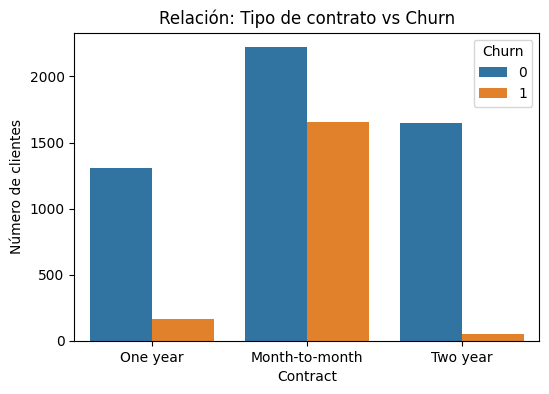

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=datos2, x='Contract', hue='Churn')
plt.title("Relación: Tipo de contrato vs Churn")
plt.ylabel("Número de clientes")
plt.show()

In [53]:
datos2['Charges.Total'] = pd.to_numeric(datos2['Charges.Total'], errors='coerce')
print(datos2['Charges.Total'].describe())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Charges.Total, dtype: float64


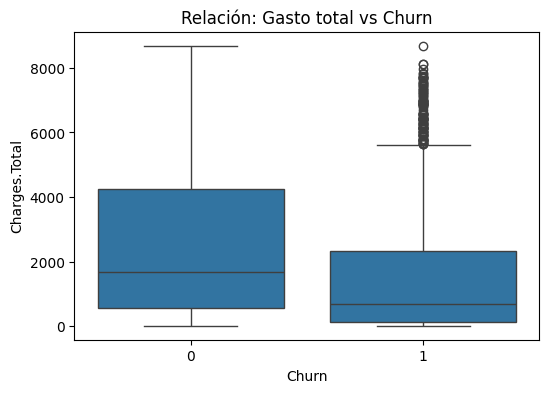

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=datos2, x='Churn', y='Charges.Total')
plt.title("Relación: Gasto total vs Churn")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test :", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test :", y_test.shape)

Tamaño X_train: (7243, 6560)
Tamaño X_test : (3105, 6560)
Tamaño y_train: (7243,)
Tamaño y_test : (3105,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [59]:
y_pred_lr = log_reg.predict(X_test)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

=== Regresión Logística ===
[[1229  324]
 [ 101 1451]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1553
           1       0.82      0.93      0.87      1552

    accuracy                           0.86      3105
   macro avg       0.87      0.86      0.86      3105
weighted avg       0.87      0.86      0.86      3105



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
[[1301  252]
 [ 161 1391]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1553
           1       0.85      0.90      0.87      1552

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



## Evaluación de los modelos

**Regresión Logística (con normalización):**

* Exactitud (Accuracy): 0.86
* Precisión (Clase 1 – Canceló): 0.82
* Recall (Clase 1 – Canceló): 0.93
* F1-score (Clase 1 – Canceló): 0.87
* Matriz de confusión:
[[1229  324]
 [ 101 1451]]

**Random Forest (sin normalización):**
* Exactitud (Accuracy): 0.87
* Precisión (Clase 1 – Canceló): 0.85
* Recall (Clase 1 – Canceló): 0.90
* F1-score (Clase 1 – Canceló): 0.87
* Matriz de confusión:
[[1301  252]
 [ 161 1391]]

**Análisis crítico y comparación de modelos**
1. **Mejor desempeño general:**
* Ambos modelos tienen un rendimiento similar con F1-score de 0.87.
* Random Forest presenta una ligera ventaja en exactitud y precisión.
* Regresión Logística obtiene mejor recall, lo que significa que detecta más clientes que realmente cancelan.

2. **Overfitting o Underfitting:**
* Regresión Logística: no presenta signos de overfitting ni underfitting, ya que es un modelo lineal y simple. Generaliza bien, aunque puede perder patrones no lineales.
* Random Forest: podría tener cierto riesgo de overfitting al ser un modelo complejo con muchos árboles, pero los resultados en el conjunto de prueba son consistentes. En caso de detectar sobreajuste, se pueden ajustar parámetros como max_depth, min_samples_split o incrementar el número de árboles.

### Regresión Logística – Coeficientes de las variables

Los coeficientes indican cómo cambia la probabilidad de cancelación según cada variable. Valores positivos aumentan la probabilidad de churn y valores negativos la disminuyen.

import pandas as pd

import numpy as np

**Extraer coeficientes de la regresión logística**

coef = log_reg.coef_[0]

variables = datos2_encoded.drop(columns=['Churn']).columns

**DataFrame con las variables más influyentes ordenadas**

importancia_lr = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', key=np.abs, ascending=False)

**Mostrar las 15 variables más relevantes**

importancia_lr.head(15)


### Random Forest – Importancia de las variables

Random Forest calcula la importancia de cada variable en función de su contribución a la reducción de la impureza en los árboles.

**Extraer importancias del Random Forest**
importancia_rf = pd.DataFrame({

    'Variable': variables,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

**Mostrar las 15 variables más relevantes**

importancia_rf.head(15)


###Informe de Cancelación de Clientes (Churn)
**Factores que más influyen en la cancelación**

Basándonos en los coeficientes de la Regresión Logística y en las importancias de variables del Random Forest, se identificaron los siguientes factores clave:

Mayor probabilidad de cancelación (impacto positivo en Churn):

* Tipo de internet: Fiber optic
* Método de pago: Electronic check
* Cargos mensuales elevados (Charges.Monthly)
* Paperless Billing (facturación sin papel)
* Ser Senior Citizen

Menor probabilidad de cancelación (impacto negativo en Churn):

* Mayor tiempo de permanencia (tenure)
* Tipo de contrato: Two year (y en menor medida One year)
* Uso de servicios adicionales: Online Security y Tech Support

Estos resultados fueron consistentes en ambos modelos: la regresión logística lo mostró en los coeficientes más significativos y el Random Forest en las variables de mayor importancia.

### Principales factores que afectan la cancelación

1. Duración del contrato: los clientes con contratos de dos años tienen una probabilidad significativamente menor de cancelar.
2. Método de pago: el uso de electronic check está asociado a una mayor cancelación, lo que sugiere una experiencia negativa con este método.
3. Tipo de servicio de internet: los clientes con fibra óptica presentan mayor churn, posiblemente por expectativas de calidad más altas o competencia fuerte en este segmento.
4. Nivel de gasto mensual: clientes con cargos mensuales más altos tienden a cancelar con más frecuencia.
5. Antigüedad: clientes con mayor tiempo de permanencia muestran mayor lealtad.
6. Servicios de soporte y seguridad: quienes tienen soporte técnico y seguridad activa tienden a cancelar menos.

### Estrategias de retención basadas en los hallazgos

* Incentivar contratos a largo plazo: ofrecer descuentos o beneficios a clientes que migren de contrato mensual a uno de dos años.
* Revisar la experiencia con electronic check: investigar fricciones, simplificar el proceso o incentivar el cambio hacia débito automático o tarjeta.
* Clientes con fibra óptica: reforzar la calidad de servicio y ofrecer soporte prioritario, ya que son los más propensos a cancelar.
* Segmentar a clientes con cargos mensuales altos: ofrecer planes personalizados, paquetes más económicos o beneficios adicionales para equilibrar la percepción de valor.
* Fortalecer el soporte y la seguridad: promover servicios como Tech Support y Online Security como valor agregado, ya que reducen la cancelación.
* Programas de fidelización para clientes nuevos: dado que el churn es más alto en los primeros meses, implementar acciones de bienvenida y seguimiento durante el primer año.